# <font color='red'> Data Visualization and Exploration</font>


### Import required libraries

In [4]:
import os
import librosa
import numpy as np
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")
import re
import string
import zipfile
from string import digits
import librosa.display
import tensorflow as tf
from tensorflow import keras

### Load an audio file

In [5]:
file_path = "audio_data/Audio_8hz/off/17c94b23_nohash_0.wav"
wav, sr = librosa.load(file_path, sr=None)
print(wav.shape, wav.max(), wav.min())

(8000,) 0.75408936 -0.7191162


In [6]:
import wave
wav = wave.open(file_path)
print("Sampling rate = ", wav.getframerate())
print("Total samples = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling rate =  8000
Total samples =  8000
Duration =  1.0


In [7]:
from scipy.io import wavfile
rate, data = wavfile.read(file_path)
print("Sampling rate = ", rate)
print("Total samples = ", data.shape)
print(data)

Sampling rate =  8000
Total samples =  (8000,)
[ 16 -51 -90 ... 155  50  85]


### Simple Sine Wave

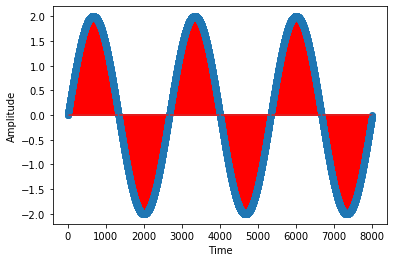

In [8]:
samples = rate
f=3
x=np.arange(samples)
y2=2*np.sin(2*np.pi*f*(x/samples))
plt.figure()
plt.stem(x,y2,'r',)
plt.plot(x,y2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


### Visualizing Audio

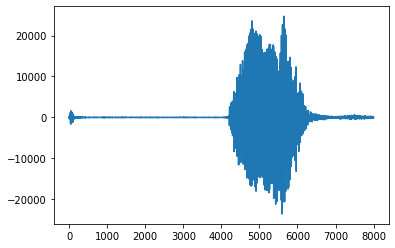

In [9]:
plt.plot(data, '-', )
plt.show()

In [10]:
def get_spectrogram(wav):
    D = librosa.stft(wav, n_fft=480, hop_length=160,
                     win_length=480, window='hamming')
    spect, phase = librosa.magphase(D)
    return spect

In [11]:
wav, sr = librosa.load(file_path, sr=None)
print(wav.shape, wav.max(), wav.min())

(8000,) 0.75408936 -0.7191162


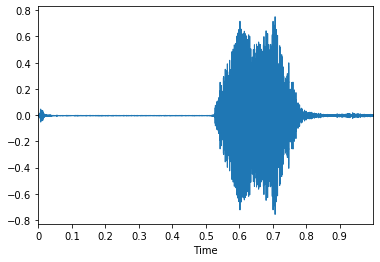

In [12]:
librosa.display.waveplot(wav,sr=sr, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

### Spectogram

spectrogram shape: (241, 51)


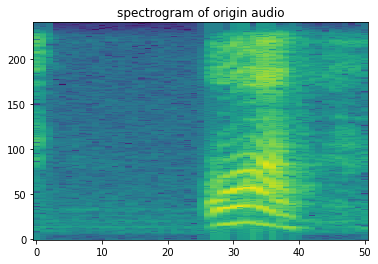

In [13]:
log_spect = np.log(get_spectrogram(wav))
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of origin audio')
plt.show()

### MFCC 

In [14]:
S = librosa.feature.mfcc(y=wav, sr=sr)

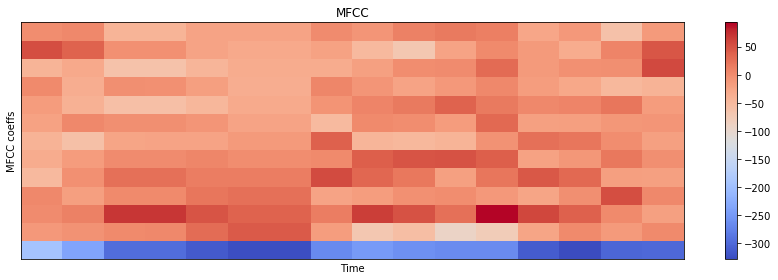

In [15]:
log_S = librosa.power_to_db(S, ref=np.max)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

### Bar Graph

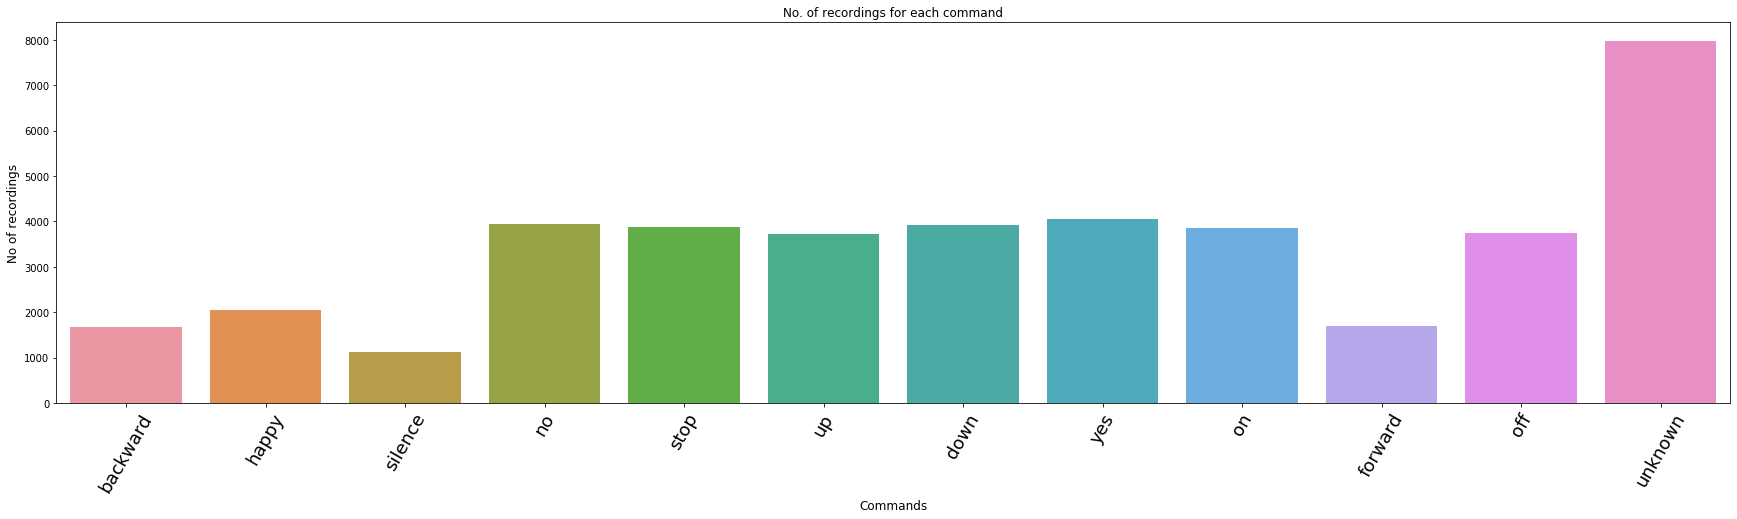

In [20]:
#find count of each label and plot bar graph
train_audio_path = "audio_data/Audio_8hz/"
labels=os.listdir(train_audio_path)
no_of_recordings=[]
unknown_recordings_count = 0
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + label) if f.endswith('.wav')]
    if(label == 'zero' or label == 'nine'):
        unknown_recordings_count = unknown_recordings_count + len(waves)
        continue
    no_of_recordings.append(len(waves))
labels.remove('zero')
labels.remove('nine')
labels.append('unknown')
no_of_recordings.append(unknown_recordings_count)
    
plt.figure(figsize=(30,7))
index = np.arange(len(labels))
sns.barplot(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=18, rotation= 60)
plt.title('No. of recordings for each command')
plt.show()

In [21]:
print(no_of_recordings)

[1664, 2054, 1120, 3941, 3871, 3723, 3917, 4044, 3844, 1692, 3745, 7986]


### Duration of recordings

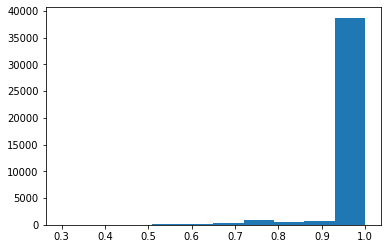

In [66]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))
plt.show()